## **Setup the Workspace**

In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 

# Activation CUDA for Pararelling Process
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
# Checking Version of Tensorflow
tf.__version__

'2.16.1'

## **Data Preprocessing**

### Grab some Images to Identify The Pattern

In [3]:
from PIL import Image

im = Image.open("D:/My Wish/Collage Data/Semester 6/Analisis Big Data/Tugas Besar/Sign-Hand-to-Text-Pipeline/Data/Train/A/0.jpg")
print(im.format, im.size, im.mode) # Read Format, Size and Mode

JPEG (310, 310) L


### Generating images for the Training Dataset

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

### Generating Images for The Test Dataset 

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

### Creating the Training Set (Reader File)

In [6]:
training_set = train_datagen.flow_from_directory('../Data/Train', 
                                                target_size=(128, 128),
                                                batch_size = 10, 
                                                color_mode = 'grayscale',
                                                class_mode = 'categorical')

Found 12845 images belonging to 27 classes.


### Creating the Test Set (Reader File)

In [7]:
testing_set = test_datagen.flow_from_directory('../Data/Test', 
                                                target_size=(128, 128),
                                                batch_size = 10, 
                                                color_mode = 'grayscale',
                                                class_mode = 'categorical')

Found 4268 images belonging to 27 classes.


## **Building DNN**

### **Inisialization CNN**

In [8]:
classifier = tf.keras.models.Sequential()

### **First Convolution Layer**

In [9]:
classifier.add(tf.keras.layers.Conv2D(filters=32,
                                    kernel_size=3,
                                    padding="same",
                                    activation="relu",
                                    input_shape=(128, 128, 1)))

d:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### **Pooling Layer**

In [10]:
classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                        strides=2,
                                        padding='valid'))

### **Adding Second Convolutional Layer**

In [11]:
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                    kernel_size=3, 
                                    padding="same",
                                    activation="relu"))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=3,
                                        strides=2,
                                        padding="valid"))

### **Flattening**

In [12]:
classifier.add(tf.keras.layers.Flatten())

### **Fully Connected Layer**

In [13]:
classifier.add(tf.keras.layers.Dense(units=128,activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.50))
classifier.add(tf.keras.layers.Dense(units=96, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.50))
classifier.add(tf.keras.layers.Dense(units=64, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=27, activation='softmax'))

## **Training DNN**

### Compiling the CNN Models

In [14]:
classifier.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

### Summary The Models

In [15]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 27)             │         1,755 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,966,299 (15.13 MB)

 Trainable params: 3,966,299 (15.13 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = classifier.fit(training_set,
                epochs=5,
                validation_data = testing_set)

Epoch 1/5


d:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1285/1285 ━━━━━━━━━━━━━━━━━━━━ 204s 157ms/step - accuracy: 0.0995 - loss: 3.0909 - val_accuracy: 0.6577 - val_loss: 1.1938
Epoch 2/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 155s 121ms/step - accuracy: 0.4242 - loss: 1.7969 - val_accuracy: 0.8798 - val_loss: 0.6467
Epoch 3/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 126s 98ms/step - accuracy: 0.5350 - loss: 1.3933 - val_accuracy: 0.9154 - val_loss: 0.4820
Epoch 4/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 145s 113ms/step - accuracy: 0.5905 - loss: 1.2072 - val_accuracy: 0.9316 - val_loss: 0.3563
Epoch 5/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 139s 108ms/step - accuracy: 0.6527 - loss: 1.0382 - val_accuracy: 0.9424 - val_loss: 0.3096


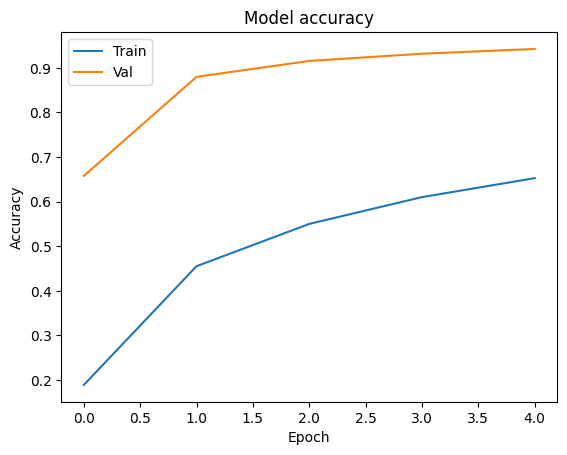

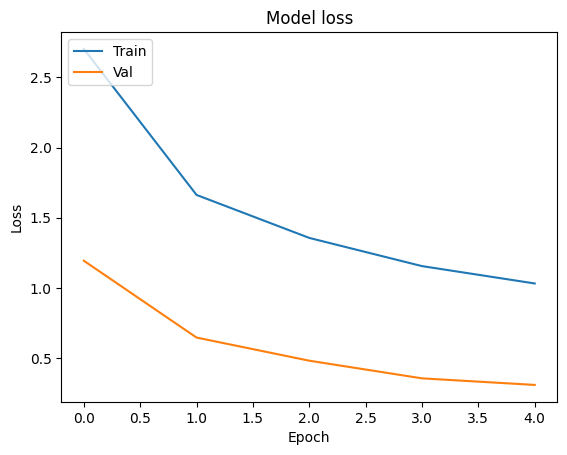

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## **Saving Models**

In [18]:
# Simpan arsitektur model ke dalam file JSON
model_json = classifier.to_json()
with open("model_new_1.json", "w") as json_file:
    json_file.write(model_json)
print("Model architecture saved")

# Simpan model dan bobotnya
classifier.save("model_new_2.h5")
print("Model and weights saved")

Model architecture saved
Model and weights saved
